# Distributions 1 : Discrete Distributions
**FIZ371 - Scientific & Technical Computations | 31/03/2020**

**Discrete Distributions**
 * Dice distribution
   * Fair dice
     1. Expected value
     2. Variance
     3. Standard deviation
   * Loaded Dice
     * Drawing from a distribution function
        * Creating a sample list
        * Using the PDF directly
 * Bernoulli / Binomial Distribution
   * Combinatrics
   * Galton Machine
    
    [Plotting: matplotlib.pyplot.bar()]

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

## Distribution
A distribution, or more directly, _a probability distribution_ is the distribution of weights among the possible outcomes of a drawing. We will start from discrete distributions (such as dice, binomial distributions) and will move on to continous distributions (such as Gaussian, Laplace distributions).

### Dice distribution
* **Fair dice**  

Let's start using a fair, 6-sided dice. If it is fair, then it means that the probability for any of the 6 possible outcomes must be the same. And as the sum of the probabilities must be equal to 1, we have:

$$p(x=1) = p(x=2) = ... =p(x=6),\quad\sum^{6}_{i=1}{p(x=i)}=1\,\Rightarrow p(x=i) = \frac{1}{6}\quad(i \in [1,6])$$

For which the graph of our probability distribution function (PDF) looks like:

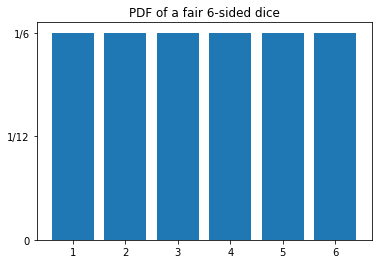

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fair_pdf = np.ones(6) * 1./6

plt.bar(np.arange(1,7),fair_pdf)
plt.yticks([0,1/12,1/6],["0","1/12","1/6"])
plt.title("PDF of a fair 6-sided dice")
plt.show()

These kind of probability distribution functions (PDFs) where every possible outcome has equal probability are called as **Uniform Distributions**.

1\. Expected (Average) Value $\left(\mu,\left<x\right>, E[x]\right)$:

$$\mu = \sum_{x_i}{x_i\cdot p(x_i)}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = range(1,7)
fair_pdf = np.ones(6) * 1./6
mean = 0;
for i in range(0,6):
    mean += x[i] * fair_pdf[i]
print ("Expected value: %.3f"%mean)

Expected value: 3.500


2\. Variance ($\sigma^2$):

$$\sigma^2 = \sum_{x_i}{x_i^2 p(x_i) - \mu^2}$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = range(1,7)
fair_pdf = np.ones(6) * 1./6
mean = 0;
for i in range(0,6):
    mean += x[i] * fair_pdf[i]

var = 0
for i in range(0,6):
    var += x[i]**2 *fair_pdf[i]
var = var - mean**2

print ("Expected value: %.3f"%mean)
print ("Variance: %.3f"%var)

Expected value: 3.500
Variance: 2.917


3\. Standard Deviation ($\sigma$):

$$
\begin{align*}
\sigma&=\sqrt{\sigma^2}\\
\sigma &= \sqrt{\left<x^2\right> - \left<x\right>^2}\\
&=\sqrt{\sum_{i}{p_i \left(x_i - \mu\right)^2}}
\end{align*}$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = range(1,7)
fair_pdf = np.ones(6) * 1./6
mean = 0;
for i in range(0,6):
    mean += x[i] * fair_pdf[i]

var = 0
for i in range(0,6):
    var += x[i]**2 *fair_pdf[i]
var = var - mean**2

std = 0
for i in range(0,6):
    std += fair_pdf[i]*(x[i]-mean)**2
std = np.sqrt(std)

print ("Expected value: %.3f"%mean)
print ("Variance: %.3f"%var)
print ("Standard Deviation: %.3f"%std)

Expected value: 3.500
Variance: 2.917
Standard Deviation: 1.708


* **Loaded Dice**  

Now consider that we have a "loaded dice" such that its PDF is given by:

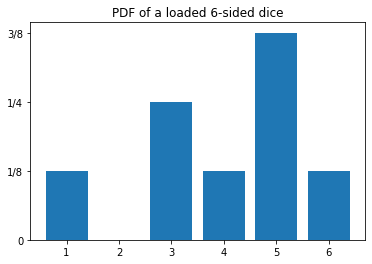

In [5]:
import numpy as np
import matplotlib.pyplot as plt

loaded_pdf = np.array([1/8, 0, 2/8, 1/8, 3/8, 1/8])

plt.bar(np.arange(1,7),loaded_pdf)
plt.yticks([0,1/8,1/4,3/8],["0","1/8","1/4","3/8"])
plt.title("PDF of a loaded 6-sided dice")
plt.show()

Let's calculate its properties:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,7)
loaded_pdf = np.array([1/8, 0, 2/8, 1/8, 3/8, 1/8])

mean = 0;
for i in range(0,6):
    mean += x[i] * loaded_pdf[i]

var = 0
for i in range(0,6):
    var += x[i]**2 *loaded_pdf[i]
var = var - mean**2

std = 0
for i in range(0,6):
    std += loaded_pdf[i]*(x[i]-mean)**2
std = np.sqrt(std)

print ("Expected value: %.3f"%mean)
print ("Variance: %.3f"%var)
print ("Standard Deviation: %.3f"%std)

Expected value: 4.000
Variance: 2.250
Standard Deviation: 1.500


### Drawing from a distribution function
We have our probability distribution function, but how do we draw from such a distribution? Looking at the distribution graph, we see that, no matter how many times we roll the dice, we'll never get a '2'. Also, in theory, out of 8 rolls, we'll get a '5' three times. But the question remains: when we have the probability distribution function, how do we use to draw samples that comply with it?

**Creating a sample list**  
If the number of variables in a PDF is low like our loaded dice, we can "construct" a sample list and draw randomly (as in "uniformly") from that list. So, for the case we have, we can define our list as:
![pdfloadeddice.png](images/pdfloadeddice.png)

In [7]:
loaded_dice_set = np.array([1,3,3,4,5,5,5,6])

This list has the same probability of outcomes as that of the given distribution (e.g., there are two 3s out of a total of eight numbers, so its probability is 1/3, etc.). Thus, we can use a uniform random number generator to produce a random number between 0 and 7 and correspond it with our set (0 -> "1"; 1 -> "3"; 2 -> "3"; ... ; 7 -> "6"):

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing the seed so that the results are repeatable
np.random.seed(371)

# Let's draw 10 numbers
N = 10

loaded_dice_set = np.array([1,3,3,4,5,5,5,6])

# Creating an empty array to store the drawn numbers
drawn_numbers = np.array([])

for i in range (0,N):
    # Randomly pick a number in [0,7] ( =[0,8) ) 
    r = np.random.randint(0,8)
    rth_element = loaded_dice_set[r]
    
    # Add this to our drawn_numbers set
    drawn_numbers = np.append(drawn_numbers,rth_element)

print(drawn_numbers)

[5. 3. 3. 1. 5. 5. 4. 5. 4. 3.]


In [9]:
# Let's calculate the frequencies of occurences:
freqs = np.zeros(7)
for i in range(1,7):
    freqs[i] = np.sum(drawn_numbers == i)
    print ("Number of occurences of %d: %d"%(i,freqs[i]))

Number of occurences of 1: 1
Number of occurences of 2: 0
Number of occurences of 3: 3
Number of occurences of 4: 2
Number of occurences of 5: 4
Number of occurences of 6: 0


[0.1 0.  0.3 0.2 0.4 0. ]


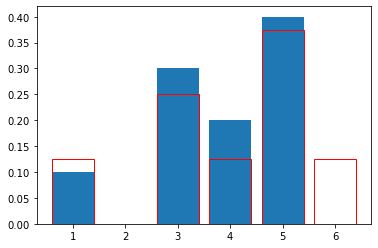

In [10]:
# From here on, calculating the occurence probabilities are straightforward:
probs = freqs / 10.
probs = probs[1:7] # Taking out the dummy 0th entry
print(probs)

# We will use the original probability dist for comparison
probs_real = np.array([0, 1/8, 0, 2/8, 1/8, 3/8, 1/8])

plt.bar(range(1,7),probs)
plt.bar(range(1,7),probs_real[1:7],color="none",edgecolor="red")
plt.show()

It doesn't quite match that of the original distribution... Can it be due to the low number of draws we have made? Let's up it from 10 to 10000:

Number of occurences of 1: 1239
Number of occurences of 2: 0
Number of occurences of 3: 2559
Number of occurences of 4: 1254
Number of occurences of 5: 3731
Number of occurences of 6: 1217
[0.1239 0.     0.2559 0.1254 0.3731 0.1217]


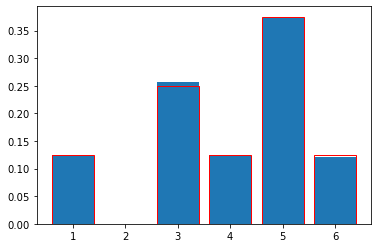

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing the seed so that the results are repeatable
np.random.seed(371)

# Let's draw 10000 numbers
N = 10000

loaded_dice_set = np.array([1,3,3,4,5,5,5,6])

# Creating an empty array to store the drawn numbers
drawn_numbers = np.array([])

for i in range (0,N):
    # Randomly pick a number in [0,7] ( =[0,8) ) 
    r = np.random.randint(0,8)
    rth_element = loaded_dice_set[r]
    
    # Add this to our drawn_numbers set
    drawn_numbers = np.append(drawn_numbers,rth_element)
    
# Let's calculate the frequencies of occurences:
freqs = np.zeros(7)
for i in range(1,7):
    freqs[i] = np.sum(drawn_numbers == i)
    print ("Number of occurences of %d: %d"%(i,freqs[i]))

# From here on, calculating the occurence probabilities are straightforward:
probs = freqs / N
probs = probs[1:7] # Taking out the dummy 0th entry
print(probs)

# We will use the original probability dist for comparison
probs_real = np.array([0, 1/8, 0, 2/8, 1/8, 3/8, 1/8])

plt.bar(range(1,7),probs)
plt.bar(range(1,7),probs_real[1:7],color="none",edgecolor="red")
plt.show()

Much, much better!... 8)

**Using the PDF directly**  
Most of the time, we don't have a small number of options (in the limit, we will be talking about continous outcomes), or even rational probabilities meaning that, we are not able to construct a sample box representing the distribution precisely. In those times, we literally employ the probabilities:
1. First, pick a random possible outcome
2. Then, roll a fair dice to see if it would come

Codewise, this translates to:

Number of occurences of 1: 1300
Number of occurences of 2: 0
Number of occurences of 3: 2528
Number of occurences of 4: 1252
Number of occurences of 5: 3735
Number of occurences of 6: 1186

Calculated probabilities: 
 [0.13   0.     0.2528 0.1252 0.3735 0.1186]


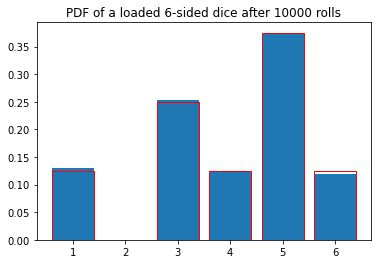

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing the seed so that the results are repeatable
np.random.seed(371)

# The first 0 is to cover the dummy 0th value
probs = np.array([0, 1/8, 0, 2/8, 1/8, 3/8, 1/8])

N = 10000

drawn_numbers = np.array([])

while drawn_numbers.size<=N:
    # First pick a random integer from [1,6]
    r = np.random.randint(1,7)
    
    # It's happening probability is probs[r],
    # so, roll a dice, if the outcome is less than the
    # probability, accept it, else, reject it
    if(np.random.rand()<probs[r]):
        drawn_numbers = np.append(drawn_numbers,r)

# Calculate the frequencies of occurence & probabilities from the set:
freqs = np.zeros(7)
for i in range(1,7):
    freqs[i] = np.sum(drawn_numbers == i)
    print ("Number of occurences of %d: %d"%(i,freqs[i]))
    
probs2 = freqs / N
probs2 = probs2[1:7] # Taking out the dummy 0th entry
print("\nCalculated probabilities: \n",probs2)
plt.bar(range(1,7),probs2)
plt.bar(range(1,7),probs[1:7],color="none",edgecolor="red")
plt.title("PDF of a loaded 6-sided dice after %d rolls"%(N))
plt.show()

## Bernoulli/Binomial Distribution
We will start simple: consider a draw where there is only two possible outcomes like the flipping of a coin (heads|tails), signal from a digital source (0|1), the turn taken (left|right), etc.

Let a flipped coin's probability to come heads (*x=1*) be $0\le p\le1$ instead of the usual $\frac{1}{2}$ (i.e., not necessarily fair).

so the probabilities are:

$$\begin{align*}P(x=1) &= p\\
P(x=0) &= 1-p\end{align*}$$

we can combine these two equations into one such as:

$$P(x) = p^x \left(1-p\right)^{1-x}$$

1\. Mean Value: 

$$\mu=\left<x\right> = 1. p+ 0. (1-p) = p$$

2\. Variance: 

$$\left<x^2\right> =1^2. p+ 0^2. (1-p) = p\\
\rightarrow \sigma^2 = \left<x^2\right> - \left<x\right>^2 = p - p^2 = p (1-p)$$

If the flipping / choosing is repeated *n* times:

$$\begin{align*}P_{X_1,X_2,...,X_n}(x_1,x_2,...,x_n) &= P_{X_1}(x_1). P_{X_2}(x_2)...P_{X_n}(x_n)\\
&=\left[p^{x_1}\left(1-p\right)^{1-x_1}\right].
\left[p^{x_2}\left(1-p\right)^{1-x_2}\right]...
\left[p^{x_n}\left(1-p\right)^{1-x_n}\right]\\
&=p^{x_1+x_2+...+x_n}\left(1-p\right)^{n-x_1-x_2-...-x_n}\\
&=p^{y}\left(1-p\right)^{n-y}
\end{align*}$$


where _y_ is the number of 1s among $x_1,x_2,...,x_n$.

The probability of the chosen outcome occurring a chosen number of times (_k_):

$$p\left(x=k\right) = \mathbb{C}_{n,k}\, p^k\, \left(1-p\right)^{n-k}$$

Here, $\mathbb{C}_{n,k}$ (pronounced as "n choose k", also represented by $n \choose k$ is defined as:

$$\mathbb{C}_{n,k} = \frac{\mathbb{P}_{n,k}}{k!}$$

and gives the possible outcomes where order is not important. $\mathbb{P_{n,k}}$ is the permutation number and is used directly when the order is important $\left(\mathbb{P} = \frac{n!}{(n-k)!}\right)$.  

Thus, **Binomial Distribution** is defined as the <u>probability of an outcome between two possible options _k_ times in a drawing of *n* times</u>:

$$\begin{align*}P(n,k) &= \mathbb{C}_{n,k}\, p^k\, \left(1-p\right)^{n-k}\\
&=\frac{n!}{k!\left(n-k\right)!}\,p^k\, \left(1-p\right)^{n-k}\end{align*}$$

### Combinatrics
Let's calculate a couple of $\mathbb{C}_{n,k}$ for various _n & k_ values:

In [13]:
from scipy.special import comb
import numpy as np

# comb() is the "n choose k" function

for n in range(0,5):
    for k in range(0,n+1):
        print("C(%d,%d): %d"%(n,k,comb(n,k)),end=' ')
    print("")

C(0,0): 1 
C(1,0): 1 C(1,1): 1 
C(2,0): 1 C(2,1): 2 C(2,2): 1 
C(3,0): 1 C(3,1): 3 C(3,2): 3 C(3,3): 1 
C(4,0): 1 C(4,1): 4 C(4,2): 6 C(4,3): 4 C(4,4): 1 


A pattern is emerging! Let's output only the coefficients and distribute them evenly:

In [14]:
from scipy.special import comb
import numpy as np

for n in range(0,5):
    kstring = ""
    for k in range(0,n+1):
        kstring += "%d"%(comb(n,k))+" "
    print(kstring.center(60))

                             1                              
                            1 1                             
                           1 2 1                            
                          1 3 3 1                           
                         1 4 6 4 1                          


We have re-derived the [Pascal's Triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle)!

(Pay attention that the first row is $n = 0$ and the first column is $k=0$!)

Pascal's triangle has many applications. For example, in our combinatrix, it gives the possible combinations from n-elements into k-element sets, with the order not being important, e.g.:  
`n = 3 : {a,b,c}
k = 2 : {a,b}, {b,c}, {a,c}
==> C(3,2) = 3!/[2!(3-2)!] = 3`

On the contrary, if the order is important (e.g., $\{a,b\}\ne{b,a}$), then we need to use the permutation operator, e.g.:
`n = 3 : {a,b,c}
k = 2 : {a,b}, {b,a}, {b,c}, {c,b}, {a,c}, {c,a}
==> P(3,2) = 3!/(3-2)! = 6`

### Galton Machine
A Galton machine is made by arranging nails in diagonals on a vertical board:
![GaltonBoard.png](images/GaltonBoard.png)  
Image from [Wikipedia](https://en.wikipedia.org/wiki/Bean_machine#/media/File:GaltonBoard.png)

Balls are dropped from the top, thus at each pin they hit, there is an equal chance that they will scatter towards left or right. In the next pin they once again have a ½ chance to go towards left or right and this accumulates. So the probabilities for the first levels can be plotted as:

![GaltonProbabilities.png](images/GaltonProbabilities.png)

For example, to get the left-most pin, the ball must go towards left 4 times (left->left->left->left), making the total probability of getting there $\frac{1}{16}$. Or, to get to the middle pin in the center of the 2nd level, it can follow one of the two-ways: either making a left->right, or making a right->left, thus making its cumulative probability to be there the sum of these possibilities, i.e., $\frac{1}{4}+ \frac{1}{4} = \frac{2}{4}= \frac{1}{2}$.

Now, let's consult Pascal's triangle once again, but this time, let's normalize each row, such that every row's sum is equal to 1:

In [15]:
from scipy.special import comb
from fractions import Fraction
import numpy as np

for n in range(0,5):
    kstring = ""
    sum_of_the_n_th_row = 0;
    for k in range(0,n+1):
        sum_of_the_n_th_row += (comb(n,k))
    for k in range(0,n+1):
        kstring += "%s"%str(Fraction(comb(n,k)/sum_of_the_n_th_row))+"  "
    print(kstring.center(60))

                            1                               
                         1/2  1/2                           
                      1/4  1/2  1/4                         
                    1/8  3/8  3/8  1/8                      
                1/16  1/4  3/8  1/4  1/16                   


... which are exactly our calculated probabilities above!

Let's implement a Galton machine simulator -- we're not going to use any of the probabilities calculated above. We will simply send each ball, one by one, and randomly pick left/right at each nail.

So, here is the algorithm of the things we're going to implement:
0. Define number of levels (n) and number of balls (N).
1. Set the initial coordinate(box) of each ball to 0 (leftmost box).
2. At every level, randomly pick left or right:  
      * If it is left, keep the coordinate.  
      * If it is right, increase the coordinate by 1.
3. Record the final coordinate(box) of the ball by increasing that box' count by 1.
4. Go to 1 until all balls are processed.

Simulation results:
[0.061  0.2525 0.3807 0.2423 0.0635]

Pascal's Triangle:
[0.0625 0.25   0.375  0.25   0.0625]


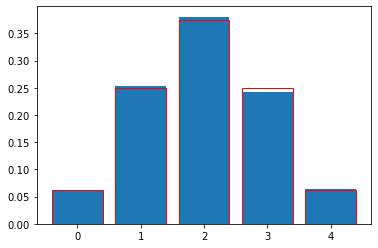

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing the seed so that the results are repeatable
np.random.seed(371)

# Number of levels
n = 4 # this means that we're going to have (n+1) boxes

# Number of balls
N = 10000

# Initialize the boxes (numbered from 0 to n)
arr_boxes = np.zeros(n+1)

# Loop over the balls
for i in range(0,N):
    position = 0
    for level in range(0,n):
        direction = np.random.randint(2)
        # print(direction,end=" ")
        position += direction

    # if it goes left everytime, then the position
    # would be: 0 which is the leftmost box: 0
        
    # if it goes right everytime, then the position
    # would be: +n which is the rightmost box: #n
    # print(str(position))
    arr_boxes[position] += 1
print("Simulation results:")
print(arr_boxes/N)

print("")

# Let's compare it with the direct Pascal's triangle results:
pascal_triangle = np.zeros(n+1)
for kk in range(n+1):
    pascal_triangle[kk] = comb(n,kk)
#print(pascal_triangle)
pascal_triangle = pascal_triangle / np.sum(pascal_triangle)
print("Pascal's Triangle:")
print(pascal_triangle)

# While we're at it, let's also plot the probabilities by
# dividing the number of balls in each box to the tall # of balls:
plt.bar(range(n+1),arr_boxes/N)

# and project upon it the values from Pascal's triangle:
plt.bar(range(n+1),pascal_triangle,color="none",edgecolor="red")

plt.show()

In our next lecture, we'll increase the number of balls and also will take the number of levels -almost- to infinity and then we'll be dealing with continous distributions!